# Task 2: Core Analysis & Visualization Design

## Milestone 2: Core Analysis & Visualization Design (Weeks 2-4)

### Objectives:
- Perform statistical analysis to understand distributions, correlations, seasonal patterns, and trends
- Identify extreme weather events
- Compare weather conditions across regions
- Select suitable visualization types (Choropleth maps, Line charts, Scatterplots, Heatmaps)
- Design an interactive dashboard layout (wireframes/mockups)

### Deliverable:
A report detailing analytical findings (statistical summaries, trends, extreme events, comparative analysis) and a set of wireframes/mockups for the dashboard.


In [1]:
%%writefile climatescope_app.py
# (Copy-paste the full Streamlit code from the last cell of Task-2.ipynb here)

Overwriting climatescope_app.py


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from datetime import datetime
import os

warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Try to use seaborn style, fallback to default if not available
try:
    plt.style.use('seaborn-darkgrid')
except OSError:
    try:
        plt.style.use('seaborn-v0_8')
    except OSError:
        plt.style.use('default')

sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## Step 1: Load Cleaned Data


In [3]:
# Load cleaned datasets
if os.path.exists('cleaned_weather_data.csv'):
    df = pd.read_csv('cleaned_weather_data.csv', parse_dates=['last_updated'])
    print(f"Loaded cleaned_weather_data.csv: {df.shape}")
else:
    print("Error: cleaned_weather_data.csv not found. Please run Task-1 first.")
    df = None

if os.path.exists('monthly_weather_data.csv'):
    monthly_df = pd.read_csv('monthly_weather_data.csv')
    print(f"Loaded monthly_weather_data.csv: {monthly_df.shape}")
else:
    monthly_df = None

if os.path.exists('daily_weather_data.csv'):
    daily_df = pd.read_csv('daily_weather_data.csv', parse_dates=['date'])
    print(f"Loaded daily_weather_data.csv: {daily_df.shape}")
else:
    daily_df = None


Loaded cleaned_weather_data.csv: (107768, 49)
Loaded monthly_weather_data.csv: (3972, 26)
Loaded daily_weather_data.csv: (107523, 16)


## Step 2: Statistical Analysis - Distributions


In [4]:
# Statistical summary of key weather variables
print("=" * 80)
print("STATISTICAL SUMMARY OF KEY WEATHER VARIABLES")
print("=" * 80)

key_variables = ['temperature_celsius', 'humidity', 'pressure_mb', 'wind_kph', 
                 'precip_mm', 'cloud', 'uv_index']

stats_summary = df[key_variables].describe()
print("\nDescriptive Statistics:")
print(stats_summary)

# Additional statistics
print("\n" + "=" * 80)
print("ADDITIONAL STATISTICAL MEASURES")
print("=" * 80)

for var in key_variables:
    data = df[var].dropna()
    print(f"\n{var.upper()}:")
    print(f"Mean: {data.mean():.2f}")
    print(f"Median: {data.median():.2f}")
    print(f"Mode: {data.mode()[0] if len(data.mode()) > 0 else 'N/A'}")
    print(f"Std Dev: {data.std():.2f}")
    print(f"Skewness: {stats.skew(data):.2f}")
    print(f"Kurtosis: {stats.kurtosis(data):.2f}")
    print(f"Range: {data.max() - data.min():.2f}")
    print(f"IQR: {data.quantile(0.75) - data.quantile(0.25):.2f}")


STATISTICAL SUMMARY OF KEY WEATHER VARIABLES

Descriptive Statistics:
       temperature_celsius       humidity    pressure_mb       wind_kph  \
count        107768.000000  107768.000000  107768.000000  107768.000000   
mean             22.530220      64.886896    1014.004380      13.091607   
std               8.885309      24.161443       6.932559       8.484295   
min             -24.900000       2.000000     947.000000       3.600000   
25%              17.400000      48.000000    1010.000000       6.500000   
50%              24.400000      70.000000    1013.000000      11.200000   
75%              28.200000      84.000000    1018.000000      18.000000   
max              49.200000     100.000000    1100.000000     400.000000   

           precip_mm          cloud       uv_index  
count  107768.000000  107768.000000  107768.000000  
mean        0.140482      39.487390       3.717902  
std         0.593075      33.831658       3.601027  
min         0.000000       0.000000       

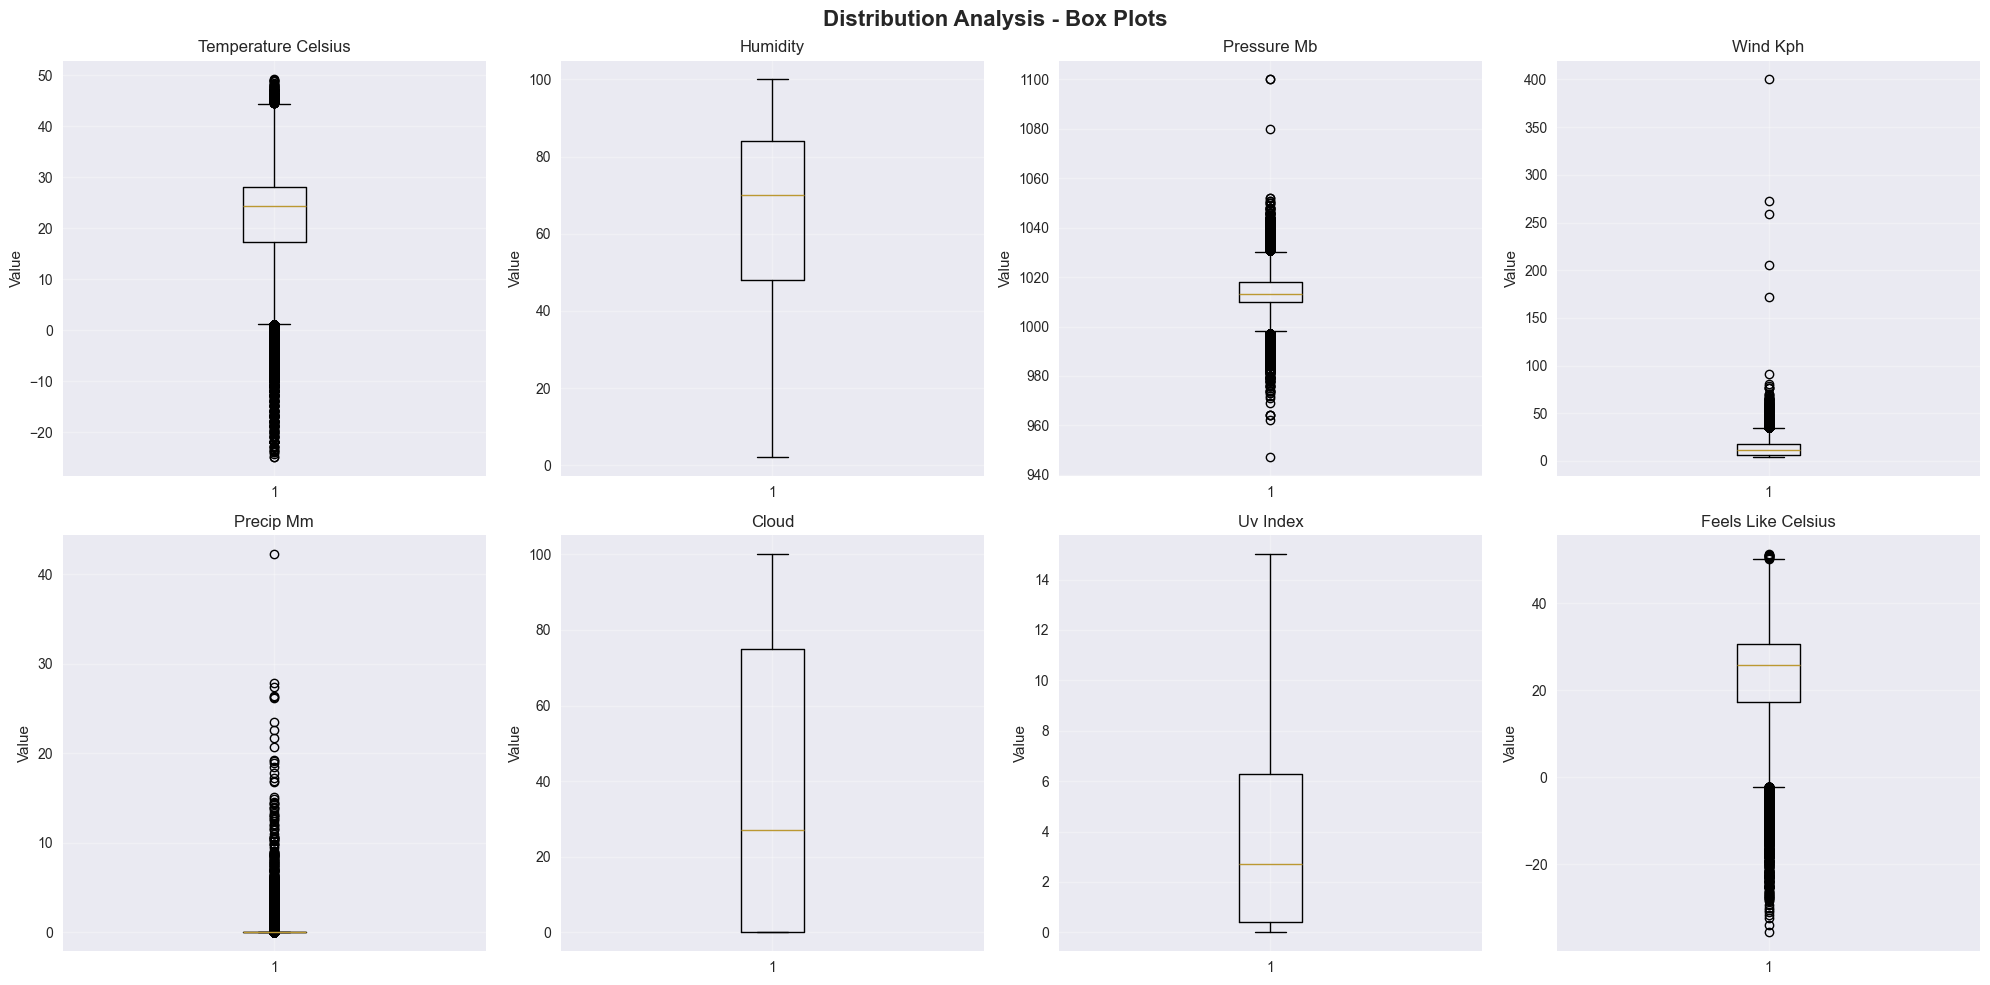

In [5]:
# Visualize distributions with box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Distribution Analysis - Box Plots', fontsize=16, fontweight='bold')

vars_to_plot = key_variables + ['feels_like_celsius']
for idx, var in enumerate(vars_to_plot[:8]):
    row = idx // 4
    col = idx % 4
    axes[row, col].boxplot(df[var].dropna(), vert=True)
    axes[row, col].set_title(f'{var.replace("_", " ").title()}')
    axes[row, col].set_ylabel('Value')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 3: Correlation Analysis


CORRELATION ANALYSIS

Correlation Matrix:
                     temperature_celsius  humidity  pressure_mb  wind_kph  \
temperature_celsius                1.000    -0.346       -0.481     0.116   
humidity                          -0.346     1.000        0.015    -0.096   
pressure_mb                       -0.481     0.015        1.000    -0.172   
wind_kph                           0.116    -0.096       -0.172     1.000   
precip_mm                          0.018     0.182       -0.118     0.003   
cloud                             -0.162     0.533       -0.077     0.027   
uv_index                           0.481    -0.567       -0.096     0.075   
feels_like_celsius                 0.979    -0.230       -0.482     0.091   

                     precip_mm  cloud  uv_index  feels_like_celsius  
temperature_celsius      0.018 -0.162     0.481               0.979  
humidity                 0.182  0.533    -0.567              -0.230  
pressure_mb             -0.118 -0.077    -0.096       

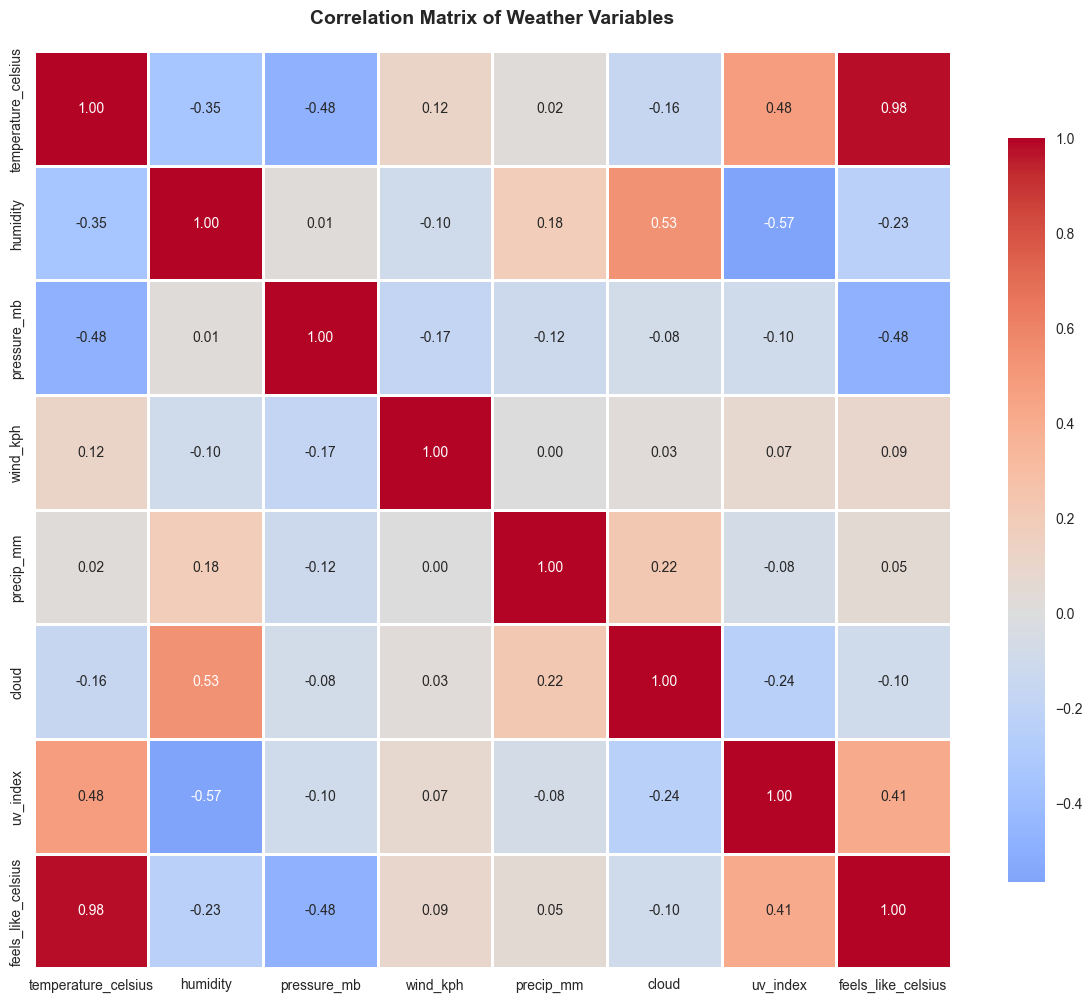

In [6]:
# Calculate correlation matrix
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

correlation_vars = ['temperature_celsius', 'humidity', 'pressure_mb', 'wind_kph', 
                    'precip_mm', 'cloud', 'uv_index', 'feels_like_celsius']

corr_matrix = df[correlation_vars].corr()
print("\nCorrelation Matrix:")
print(corr_matrix.round(3))

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Weather Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


In [7]:
# Identify strong correlations
print("\nStrong Correlations (|r| > 0.7):")
print("=" * 80)
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"{corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_val:.3f}")



Strong Correlations (|r| > 0.7):
temperature_celsius ↔ feels_like_celsius: 0.979


## Step 4: Seasonal Pattern Analysis


In [8]:
# Analyze seasonal patterns
print("=" * 80)
print("SEASONAL PATTERN ANALYSIS")
print("=" * 80)

# Monthly averages
monthly_avg = df.groupby('month').agg({
    'temperature_celsius': 'mean',
    'humidity': 'mean',
    'precip_mm': 'mean',
    'wind_kph': 'mean',
    'pressure_mb': 'mean'
}).round(2)

print("\nMonthly Averages:")
print(monthly_avg)

# Seasonal averages
seasonal_avg = df.groupby('season').agg({
    'temperature_celsius': 'mean',
    'humidity': 'mean',
    'precip_mm': 'mean',
    'wind_kph': 'mean',
    'pressure_mb': 'mean'
}).round(2)

print("\nSeasonal Averages:")
print(seasonal_avg)


SEASONAL PATTERN ANALYSIS

Monthly Averages:
       temperature_celsius  humidity  precip_mm  wind_kph  pressure_mb
month                                                                 
1                    17.39     67.13       0.13     13.00      1015.67
2                    17.42     66.10       0.11     13.33      1016.80
3                    20.10     64.14       0.13     13.27      1014.32
4                    21.97     63.03       0.13     13.30      1013.77
5                    23.96     62.31       0.15     13.68      1013.32
6                    25.70     60.89       0.14     14.01      1012.85
7                    26.02     62.32       0.17     13.70      1012.21
8                    25.75     62.94       0.15     13.28      1012.80
9                    24.25     66.22       0.15     12.78      1013.77
10                   21.60     68.86       0.13     12.09      1014.54
11                   19.19     69.95       0.14     11.80      1015.34
12                   17.75     6

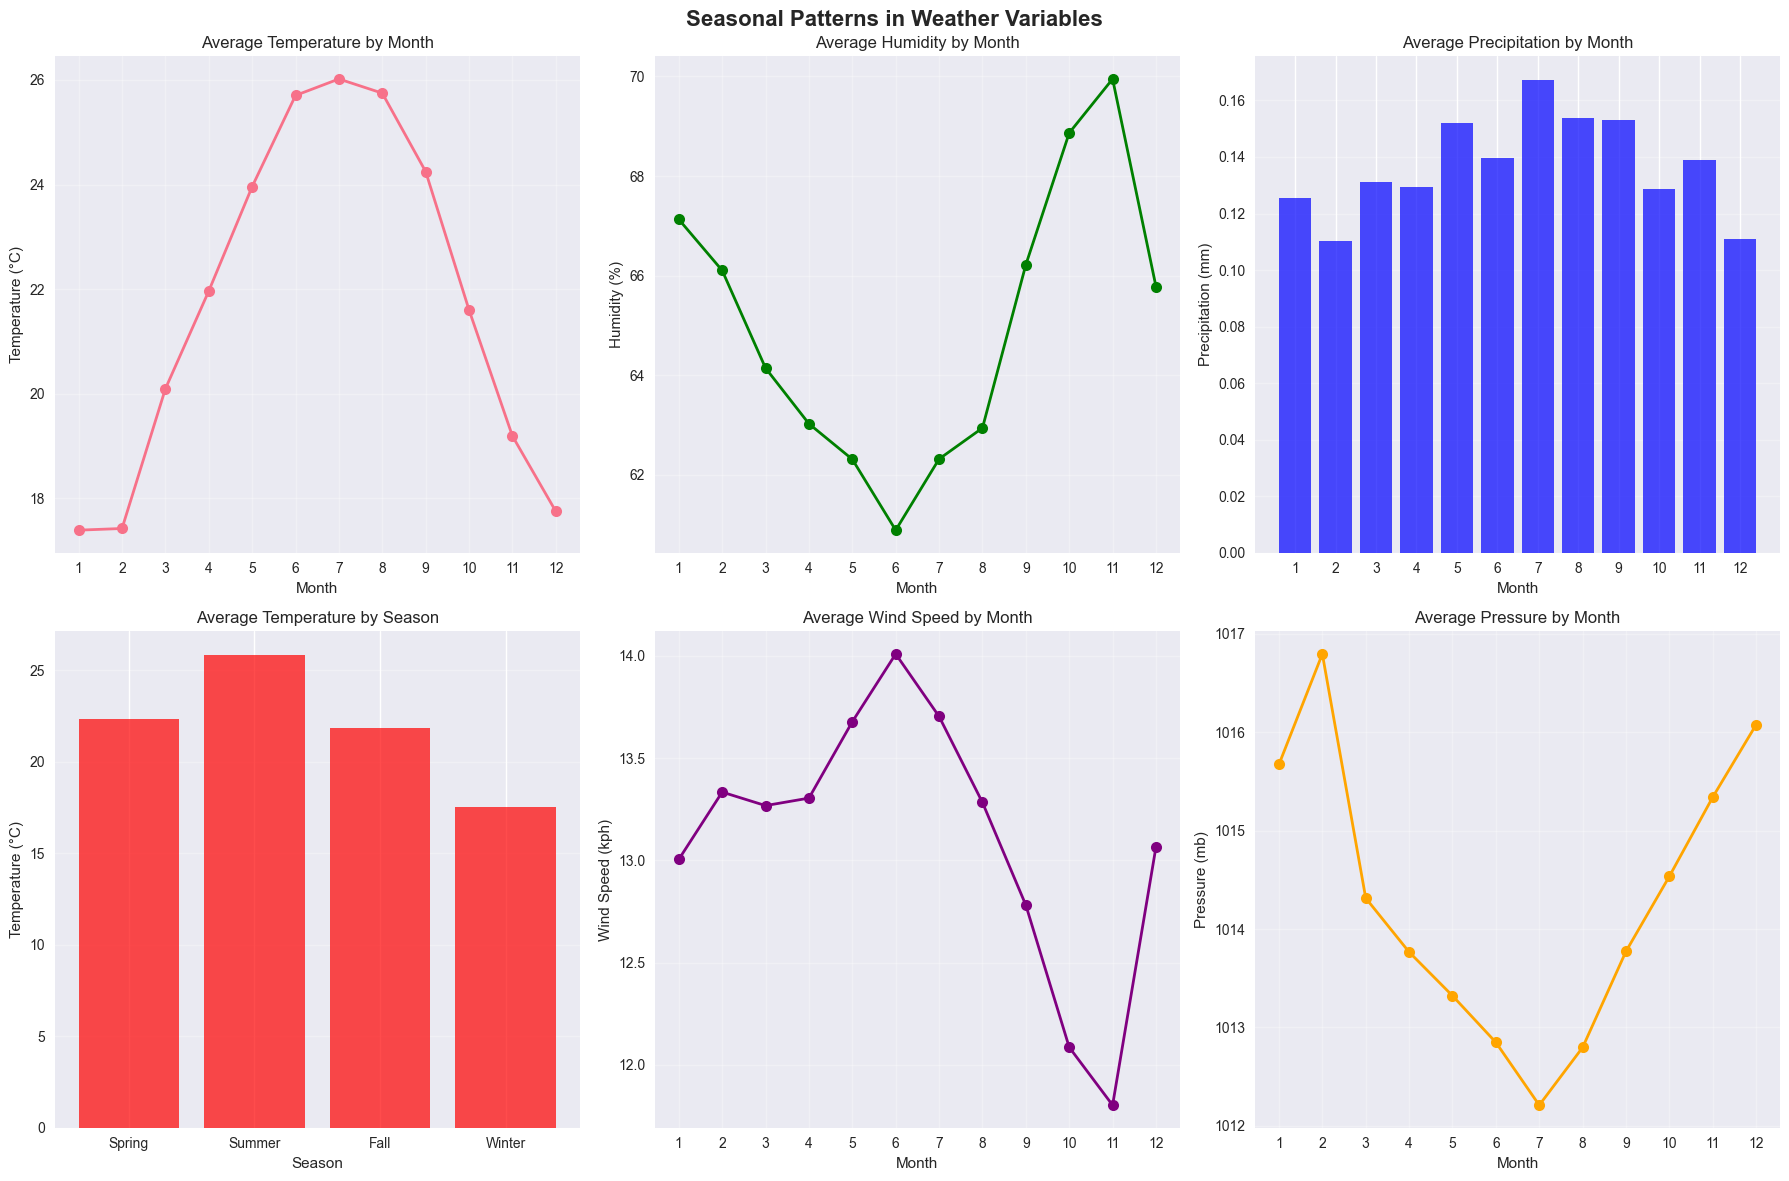

In [9]:
# Visualize seasonal patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Seasonal Patterns in Weather Variables', fontsize=16, fontweight='bold')

# Temperature by month
monthly_temp = df.groupby('month')['temperature_celsius'].mean()
axes[0, 0].plot(np.array(monthly_temp.index), np.array(monthly_temp.values), marker='o', linewidth=2, markersize=8)
axes[0, 0].set_title('Average Temperature by Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].grid(True, alpha=0.3)

# Humidity by month
monthly_humidity = df.groupby('month')['humidity'].mean()
axes[0, 1].plot(np.array(monthly_humidity.index), np.array(monthly_humidity.values), marker='o', linewidth=2, 
                markersize=8, color='green')
axes[0, 1].set_title('Average Humidity by Month')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Humidity (%)')
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].grid(True, alpha=0.3)

# Precipitation by month
monthly_precip = df.groupby('month')['precip_mm'].mean()
axes[0, 2].bar(np.array(monthly_precip.index), np.array(monthly_precip.values), color='blue', alpha=0.7)
axes[0, 2].set_title('Average Precipitation by Month')
axes[0, 2].set_xlabel('Month')
axes[0, 2].set_ylabel('Precipitation (mm)')
axes[0, 2].set_xticks(range(1, 13))
axes[0, 2].grid(True, alpha=0.3, axis='y')

# Temperature by season
seasonal_temp = df.groupby('season')['temperature_celsius'].mean()
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
seasonal_temp = seasonal_temp.reindex([s for s in season_order if s in seasonal_temp.index])
axes[1, 0].bar(range(len(seasonal_temp.index)), np.array(seasonal_temp.values), color='red', alpha=0.7)
axes[1, 0].set_xticks(range(len(seasonal_temp.index)))
axes[1, 0].set_xticklabels(seasonal_temp.index)
axes[1, 0].set_title('Average Temperature by Season')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('Temperature (°C)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Wind speed by month
monthly_wind = df.groupby('month')['wind_kph'].mean()
axes[1, 1].plot(np.array(monthly_wind.index), np.array(monthly_wind.values), marker='o', linewidth=2, 
                markersize=8, color='purple')
axes[1, 1].set_title('Average Wind Speed by Month')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Wind Speed (kph)')
axes[1, 1].set_xticks(range(1, 13))
axes[1, 1].grid(True, alpha=0.3)

# Pressure by month
monthly_pressure = df.groupby('month')['pressure_mb'].mean()
axes[1, 2].plot(np.array(monthly_pressure.index), np.array(monthly_pressure.values), marker='o', linewidth=2, 
                markersize=8, color='orange')
axes[1, 2].set_title('Average Pressure by Month')
axes[1, 2].set_xlabel('Month')
axes[1, 2].set_ylabel('Pressure (mb)')
axes[1, 2].set_xticks(range(1, 13))
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 5: Trend Analysis


In [10]:
# Analyze trends over time
print("=" * 80)
print("TREND ANALYSIS")
print("=" * 80)

# Convert date column if needed
if 'date' in df.columns and df['date'].dtype == 'object':
    df['date'] = pd.to_datetime(df['date'])

# Daily trends
daily_trends = df.groupby('date').agg({
    'temperature_celsius': 'mean',
    'humidity': 'mean',
    'precip_mm': 'sum',
    'wind_kph': 'mean'
}).reset_index()

print(f"\nDate range: {daily_trends['date'].min()} to {daily_trends['date'].max()}")
print(f"Number of days: {len(daily_trends)}")

# Calculate linear trend
from scipy.stats import linregress

trends = {}
for var in ['temperature_celsius', 'humidity', 'precip_mm', 'wind_kph']:
    x = np.arange(len(daily_trends))
    y = daily_trends[var].values
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    trends[var] = {
        'slope': slope,
        'r_squared': r_value**2,
        'p_value': p_value,
        'trend': 'Increasing' if slope > 0 else 'Decreasing'
    }
    print(f"\n{var}:")
    print(f"Trend: {trends[var]['trend']}")
    print(f"Slope: {slope:.6f}")
    print(f"R²: {r_value**2:.4f}")
    print(f"P-value: {p_value:.4f}")


TREND ANALYSIS

Date range: 2024-05-16 00:00:00 to 2025-11-21 00:00:00
Number of days: 554

temperature_celsius:
Trend: Decreasing
Slope: -0.005256
R²: 0.0675
P-value: 0.0000

humidity:
Trend: Increasing
Slope: 0.016240
R²: 0.4292
P-value: 0.0000

precip_mm:
Trend: Decreasing
Slope: -0.006432
R²: 0.0119
P-value: 0.0102

wind_kph:
Trend: Decreasing
Slope: -0.002779
R²: 0.1820
P-value: 0.0000


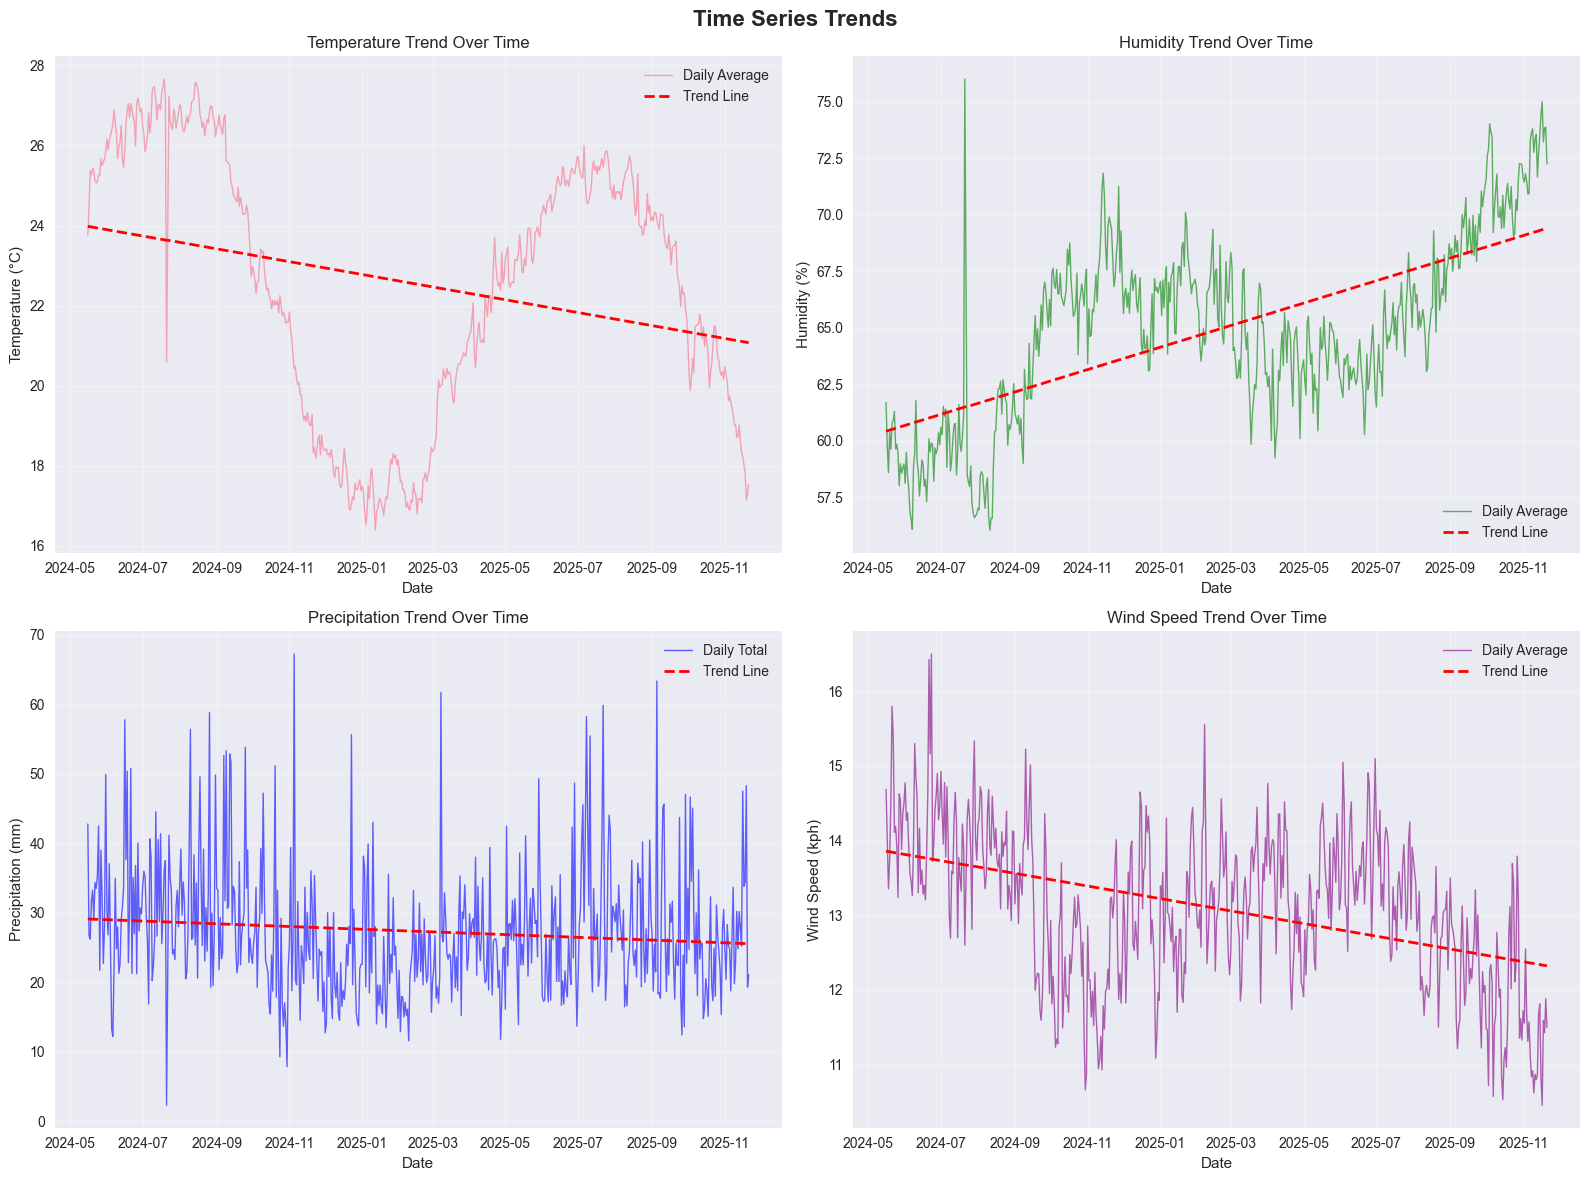

In [11]:
# Visualize trends
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Time Series Trends', fontsize=16, fontweight='bold')

# Convert to numpy arrays to avoid pandas indexing issues
dates = np.array(daily_trends['date'])
temp_values = np.array(daily_trends['temperature_celsius'])
humidity_values = np.array(daily_trends['humidity'])
precip_values = np.array(daily_trends['precip_mm'])
wind_values = np.array(daily_trends['wind_kph'])

# Temperature trend
axes[0, 0].plot(dates, temp_values, 
                alpha=0.6, linewidth=1, label='Daily Average')
# Add trend line
z = np.polyfit(range(len(daily_trends)), temp_values, 1)
p = np.poly1d(z)
axes[0, 0].plot(dates, p(range(len(daily_trends))), 
                "r--", linewidth=2, label='Trend Line')
axes[0, 0].set_title('Temperature Trend Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Humidity trend
axes[0, 1].plot(dates, humidity_values, 
                alpha=0.6, linewidth=1, color='green', label='Daily Average')
z = np.polyfit(range(len(daily_trends)), humidity_values, 1)
p = np.poly1d(z)
axes[0, 1].plot(dates, p(range(len(daily_trends))), 
                "r--", linewidth=2, label='Trend Line')
axes[0, 1].set_title('Humidity Trend Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Humidity (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Precipitation trend
axes[1, 0].plot(dates, precip_values, 
                alpha=0.6, linewidth=1, color='blue', label='Daily Total')
z = np.polyfit(range(len(daily_trends)), precip_values, 1)
p = np.poly1d(z)
axes[1, 0].plot(dates, p(range(len(daily_trends))), 
                "r--", linewidth=2, label='Trend Line')
axes[1, 0].set_title('Precipitation Trend Over Time')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Precipitation (mm)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Wind speed trend
axes[1, 1].plot(dates, wind_values, 
                alpha=0.6, linewidth=1, color='purple', label='Daily Average')
z = np.polyfit(range(len(daily_trends)), wind_values, 1)
p = np.poly1d(z)
axes[1, 1].plot(dates, p(range(len(daily_trends))), 
                "r--", linewidth=2, label='Trend Line')
axes[1, 1].set_title('Wind Speed Trend Over Time')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Wind Speed (kph)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Step 6: Extreme Weather Events Identification


In [12]:
# Identify extreme weather events
print("=" * 80)
print("EXTREME WEATHER EVENTS ANALYSIS")
print("=" * 80)

# Define thresholds for extreme events (using percentiles)
extreme_thresholds = {
    'temperature_celsius': {
        'hot': df['temperature_celsius'].quantile(0.95),
        'cold': df['temperature_celsius'].quantile(0.05)
    },
    'wind_kph': {
        'high': df['wind_kph'].quantile(0.95)
    },
    'precip_mm': {
        'heavy': df[df['precip_mm'] > 0]['precip_mm'].quantile(0.95)
    },
    'humidity': {
        'high': df['humidity'].quantile(0.95),
        'low': df['humidity'].quantile(0.05)
    }
}

print("\nExtreme Event Thresholds:")
for var, thresholds in extreme_thresholds.items():
    print(f"\n{var}:")
    for event_type, value in thresholds.items():
        print(f"{event_type.capitalize()}: {value:.2f}")

# Identify extreme events
extreme_events = {
    'extreme_heat': df[df['temperature_celsius'] >= extreme_thresholds['temperature_celsius']['hot']],
    'extreme_cold': df[df['temperature_celsius'] <= extreme_thresholds['temperature_celsius']['cold']],
    'high_wind': df[df['wind_kph'] >= extreme_thresholds['wind_kph']['high']],
    'heavy_rain': df[df['precip_mm'] >= extreme_thresholds['precip_mm']['heavy']],
    'high_humidity': df[df['humidity'] >= extreme_thresholds['humidity']['high']],
    'low_humidity': df[df['humidity'] <= extreme_thresholds['humidity']['low']]
}

print("\n\nExtreme Event Counts:")
for event_type, events in extreme_events.items():
    print(f"{event_type.replace('_', ' ').title()}: {len(events):,} occurrences ({len(events)/len(df)*100:.2f}%)")


EXTREME WEATHER EVENTS ANALYSIS

Extreme Event Thresholds:

temperature_celsius:
Hot: 34.30
Cold: 5.20

wind_kph:
High: 29.20

precip_mm:
Heavy: 1.71

humidity:
High: 97.00
Low: 18.00


Extreme Event Counts:
Extreme Heat: 5,623 occurrences (5.22%)
Extreme Cold: 5,467 occurrences (5.07%)
High Wind: 5,566 occurrences (5.16%)
Heavy Rain: 1,815 occurrences (1.68%)
High Humidity: 5,619 occurrences (5.21%)
Low Humidity: 5,468 occurrences (5.07%)


In [13]:
# Top extreme events by location
print("\n" + "=" * 80)
print("TOP EXTREME EVENTS BY LOCATION")
print("=" * 80)

# Hottest locations
hottest = df.nlargest(10, 'temperature_celsius')[['country', 'location_name', 'temperature_celsius', 'date']]
print("\nTop 10 Hottest Recordings:")
print(hottest.to_string(index=False))

# Coldest locations
coldest = df.nsmallest(10, 'temperature_celsius')[['country', 'location_name', 'temperature_celsius', 'date']]
print("\nTop 10 Coldest Recordings:")
print(coldest.to_string(index=False))

# Highest wind speeds
windiest = df.nlargest(10, 'wind_kph')[['country', 'location_name', 'wind_kph', 'date']]
print("\nTop 10 Highest Wind Speeds:")
print(windiest.to_string(index=False))

# Heaviest precipitation
rainiest = df.nlargest(10, 'precip_mm')[['country', 'location_name', 'precip_mm', 'date']]
print("\nTop 10 Heaviest Precipitation:")
print(rainiest.to_string(index=False))



TOP EXTREME EVENTS BY LOCATION

Top 10 Hottest Recordings:
country location_name  temperature_celsius       date
 Kuwait   Kuwait City                 49.2 2024-06-19
   Iraq       Baghdad                 49.1 2024-06-22
   Iraq       Baghdad                 49.1 2024-07-11
 Kuwait   Kuwait City                 48.9 2024-06-27
   Iraq       Baghdad                 48.8 2024-07-12
 Kuwait   Kuwait City                 48.8 2025-07-28
 Kuwait   Kuwait City                 48.6 2025-06-16
   Iraq       Baghdad                 48.4 2024-06-21
   Iraq       Baghdad                 48.3 2024-07-05
 Kuwait   Kuwait City                 48.2 2025-08-13

Top 10 Coldest Recordings:
   country location_name  temperature_celsius       date
  Mongolia   Ulaanbaatar                -24.9 2025-02-06
  Mongolia   Ulaanbaatar                -24.8 2025-01-01
  Mongolia   Ulaanbaatar                -24.2 2024-12-25
  Mongolia   Ulaanbaatar                -23.8 2025-01-14
Kazakhstan        Astana         

In [14]:
# Compare weather conditions across regions
print("=" * 80)
print("REGIONAL COMPARISON ANALYSIS")
print("=" * 80)

# By country
country_stats = df.groupby('country').agg({
    'temperature_celsius': ['mean', 'min', 'max', 'std'],
    'humidity': 'mean',
    'precip_mm': 'sum',
    'wind_kph': 'mean',
    'location_name': 'nunique'
}).round(2)

country_stats.columns = ['_'.join(col).strip('_') for col in country_stats.columns]
country_stats = country_stats.sort_values('temperature_celsius_mean', ascending=False)

print("\nTop 10 Hottest Countries (by average temperature):")
print(country_stats.head(10)[['temperature_celsius_mean', 'temperature_celsius_min', 
                              'temperature_celsius_max', 'location_name_nunique']])

print("\nTop 10 Coldest Countries (by average temperature):")
print(country_stats.tail(10)[['temperature_celsius_mean', 'temperature_celsius_min', 
                              'temperature_celsius_max', 'location_name_nunique']])


REGIONAL COMPARISON ANALYSIS

Top 10 Hottest Countries (by average temperature):
                      temperature_celsius_mean  temperature_celsius_min  \
country                                                                   
Saudi Arabien                            45.00                     45.0   
Marrocos                                 40.30                     40.3   
Turkménistan                             37.80                     37.8   
Qatar                                    34.37                     15.2   
United Arab Emirates                     34.18                     20.4   
Kuwait                                   34.07                     11.7   
Турция                                   34.00                     34.0   
Saudi Arabia                             33.70                     10.1   
Djibouti                                 32.76                     25.1   
Oman                                     32.52                     21.0   

                  

In [15]:
# Compare by latitude zones
def get_latitude_zone(lat):
    if lat >= 66.5:
        return 'Arctic'
    elif lat >= 23.5:
        return 'Northern Temperate'
    elif lat >= -23.5:
        return 'Tropical'
    elif lat >= -66.5:
        return 'Southern Temperate'
    else:
        return 'Antarctic'

df['latitude_zone'] = df['latitude'].apply(get_latitude_zone)

zone_stats = df.groupby('latitude_zone').agg({
    'temperature_celsius': ['mean', 'min', 'max'],
    'humidity': 'mean',
    'precip_mm': 'mean',
    'wind_kph': 'mean'
}).round(2)

zone_stats.columns = ['_'.join(col).strip('_') for col in zone_stats.columns]

print("\nWeather by Latitude Zone:")
print(zone_stats)



Weather by Latitude Zone:
                    temperature_celsius_mean  temperature_celsius_min  \
latitude_zone                                                           
Northern Temperate                     19.41                    -24.9   
Southern Temperate                     18.39                     -3.7   
Tropical                               25.81                     -0.9   

                    temperature_celsius_max  humidity_mean  precip_mm_mean  \
latitude_zone                                                                
Northern Temperate                     49.2          57.40            0.09   
Southern Temperate                     41.4          62.05            0.07   
Tropical                               47.1          71.95            0.20   

                    wind_kph_mean  
latitude_zone                      
Northern Temperate          13.26  
Southern Temperate          12.73  
Tropical                    12.98  


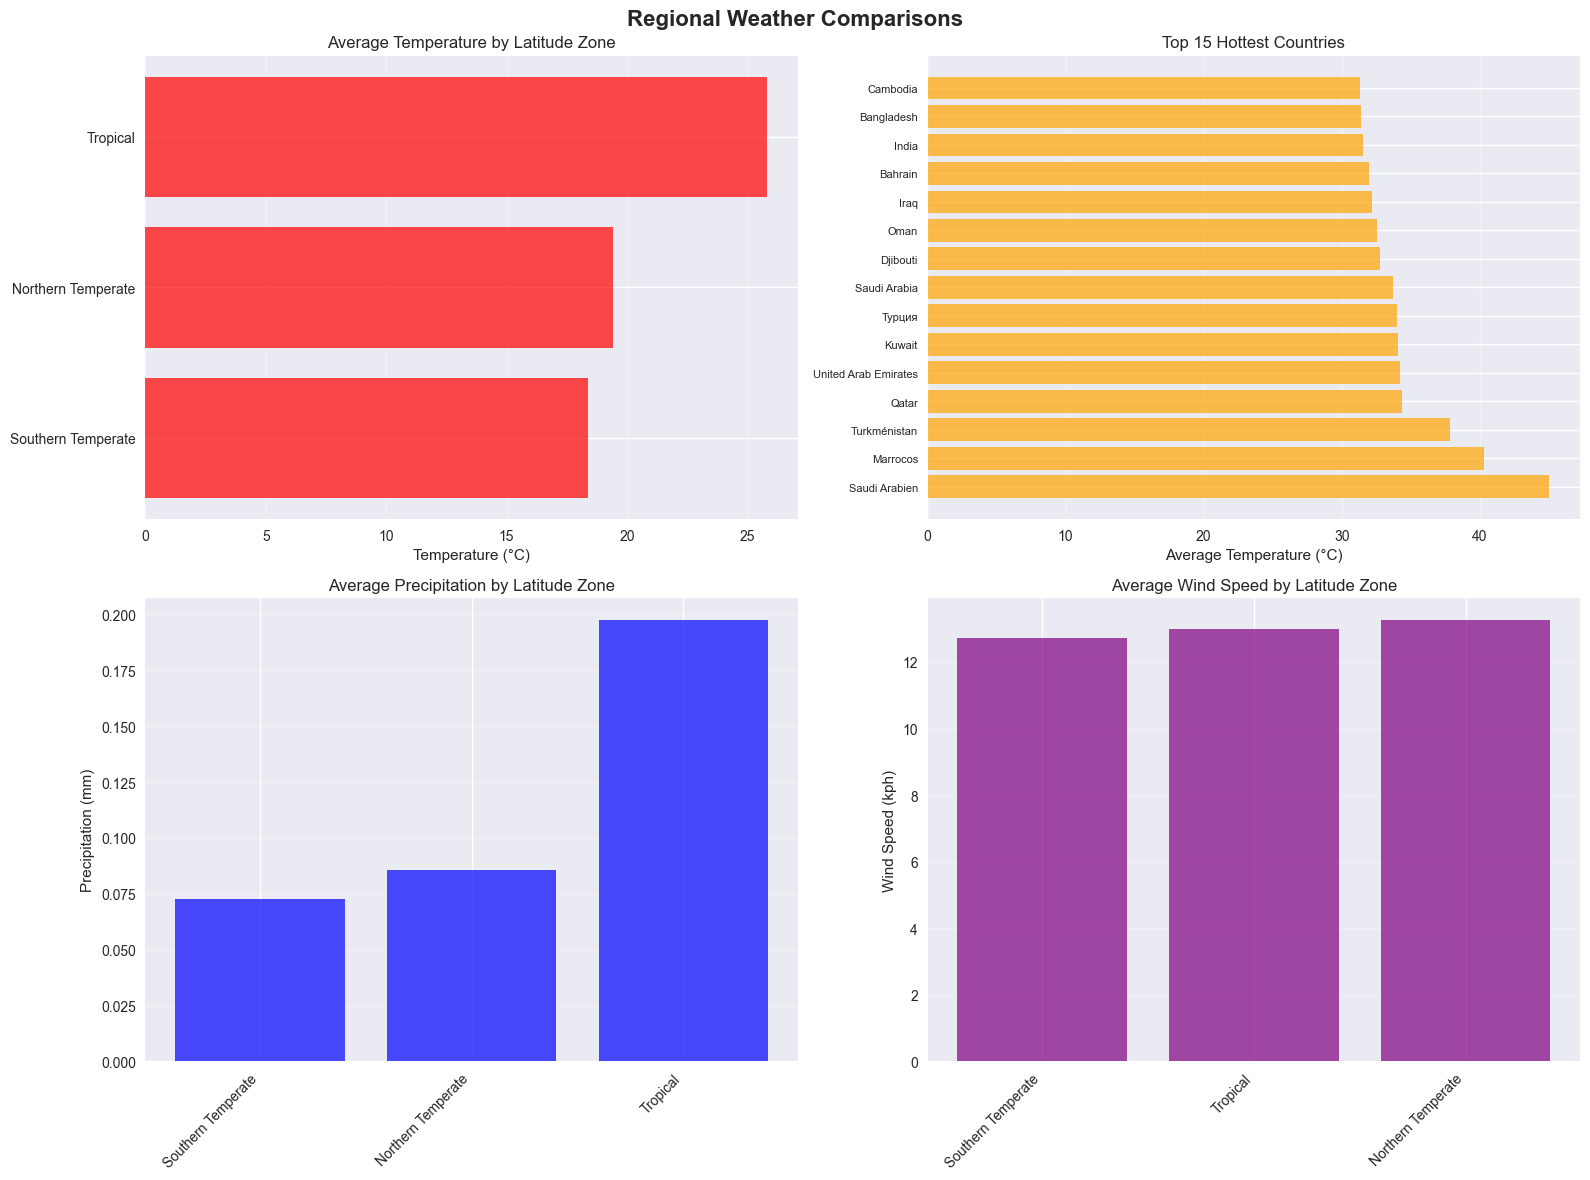

In [16]:
# Visualize regional comparisons
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Regional Weather Comparisons', fontsize=16, fontweight='bold')

# Temperature by latitude zone
zone_temp = df.groupby('latitude_zone')['temperature_celsius'].mean().sort_values()
zone_temp_labels = list(zone_temp.index)
axes[0, 0].barh(range(len(zone_temp_labels)), np.array(zone_temp.values), color='red', alpha=0.7)
axes[0, 0].set_yticks(range(len(zone_temp_labels)))
axes[0, 0].set_yticklabels(zone_temp_labels)
axes[0, 0].set_title('Average Temperature by Latitude Zone')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Top 15 countries by average temperature
top_countries = country_stats.nlargest(15, 'temperature_celsius_mean')
axes[0, 1].barh(range(len(top_countries)), np.array(top_countries['temperature_celsius_mean'].values), 
                color='orange', alpha=0.7)
axes[0, 1].set_yticks(range(len(top_countries)))
axes[0, 1].set_yticklabels(list(top_countries.index), fontsize=8)
axes[0, 1].set_title('Top 15 Hottest Countries')
axes[0, 1].set_xlabel('Average Temperature (°C)')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Precipitation by latitude zone
zone_precip = df.groupby('latitude_zone')['precip_mm'].mean().sort_values()
zone_precip_labels = list(zone_precip.index)
axes[1, 0].bar(range(len(zone_precip_labels)), np.array(zone_precip.values), color='blue', alpha=0.7)
axes[1, 0].set_xticks(range(len(zone_precip_labels)))
axes[1, 0].set_xticklabels(zone_precip_labels, rotation=45, ha='right')
axes[1, 0].set_title('Average Precipitation by Latitude Zone')
axes[1, 0].set_ylabel('Precipitation (mm)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Wind speed by latitude zone
zone_wind = df.groupby('latitude_zone')['wind_kph'].mean().sort_values()
zone_wind_labels = list(zone_wind.index)
axes[1, 1].bar(range(len(zone_wind_labels)), np.array(zone_wind.values), color='purple', alpha=0.7)
axes[1, 1].set_xticks(range(len(zone_wind_labels)))
axes[1, 1].set_xticklabels(zone_wind_labels, rotation=45, ha='right')
axes[1, 1].set_title('Average Wind Speed by Latitude Zone')
axes[1, 1].set_ylabel('Wind Speed (kph)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Step 8: Visualization Design - Dashboard Layout


In [17]:
# Create a text-based dashboard layout design
dashboard_design = """
================================================================================
                    CLIMATESCOPE DASHBOARD DESIGN
================================================================================

DASHBOARD LAYOUT (Streamlit/Web Application)
--------------------------------------------

┌─────────────────────────────────────────────────────────────────────────────┐
│                         CLIMATESCOPE - Global Weather Dashboard             │
│                         [Logo] [Title] [Date Range Selector]                │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│  FILTERS SIDEBAR (Left Panel)                                               │
│  ─────────────────────────────────────────────────────────────────────────  │
│  • Country Selector (Multi-select dropdown)                                 │
│  • Date Range Picker (Start Date - End Date)                                │
│  • Season Filter (Checkboxes: Spring, Summer, Fall, Winter)                 │
│  • Weather Variable Selector (Radio buttons)                                │
│  • Extreme Events Toggle (On/Off)                                           │
│  • Latitude Zone Filter (Checkboxes)                                        │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│  MAIN DASHBOARD AREA                                                        │
│  ─────────────────────────────────────────────────────────────────────────  │
│                                                                             │
│  ROW 1: Key Metrics (4 KPI Cards)                                           │
│  ┌──────────────┐ ┌──────────────┐ ┌──────────────┐ ┌──────────────┐        │
│  │ Avg Temp     │ │ Total Precip │ │ Avg Wind     │ │ Locations    │        │
│  │ 22.5°C       │ │ 1,234 mm     │ │ 15.2 kph     │ │ 1,234        │        │
│  └──────────────┘ └──────────────┘ └──────────────┘ └──────────────┘        │
│                                                                             │
│  ROW 2: Geographic Visualization                                            │
│  ┌──────────────────────────────────────────────────────────────────-────┐  │
│  │                    CHOROPLETH MAP                                     │  │
│  │         (Interactive world map showing selected weather variable)     │  │
│  │         - Color-coded by value                                        │  │
│  │         - Clickable countries/locations                               │  │
│  │         - Tooltip on hover                                            │  │
│  └─────────────────────────────────────────────────────────────────────-─┘  │
│                                                                             │
│  ROW 3: Time Series Analysis (2 charts side by side)                        │
│  ┌──────────────────────────────┐ ┌──────────────────────────────┐          │
│  │   LINE CHART: Temperature    │ │   LINE CHART: Precipitation  │          │
│  │   Over Time                  │ │   Over Time                  │          │
│  │   - Multiple locations       │ │   - Seasonal patterns        │          │
│  │   - Trend lines              │ │   - Monthly averages         │          │
│  └──────────────────────────────┘ └──────────────────────────────┘          │
│                                                                             │
│  ROW 4: Correlation & Distribution (2 charts)                               │
│  ┌──────────────────────────────┐ ┌──────────────────────────────┐          │
│  │   HEATMAP: Correlation       │ │   SCATTER PLOT: Temp vs      │          │
│  │   Matrix                     │ │   Humidity                   │          │
│  │   - Weather variables        │ │   - Colored by season        │          │
│  │   - Color intensity          │ │   - Regression line          │          │
│  └──────────────────────────────┘ └──────────────────────────────┘          │
│                                                                             │
│  ROW 5: Seasonal & Regional Analysis                                        │
│  ┌──────────────────────────────┐ ┌────────────────────────────-──┐         │
│  │   HEATMAP: Seasonal          │ │   BAR CHART: Top Countries    │         │
│  │   Variation by Month         │ │   by Weather Metric           │         │
│  │   - Temperature heatmap      │ │   - Horizontal bars           │         │
│  │   - Month vs Location        │ │   - Sortable                  │         │
│  └──────────────────────────────┘ └───────────────────────────-───┘         │
│                                                                             │
│  ROW 6: Extreme Events Table                                                │
│  ┌──────────────────────────────────────────────────────────────────────┐   │
│  │                    EXTREME EVENTS TABLE                              │   │
│  │  Date      | Location    | Country | Event Type | Value              │   │
│  │  ─────────────────────────────────────────────────────────────────── │   │
│  │  (Sortable, filterable table with top extreme events)                │   │
│  └──────────────────────────────────────────────────────────────────────┘   │
│                                                                             │
└─────────────────────────────────────────────────────────────────────────────┘

VISUALIZATION TYPES SELECTED:
-----------------------------
1. CHOROPLETH MAPS: Geographic patterns of weather variables
2. LINE CHARTS: Time-series trends (daily, monthly, seasonal)
3. SCATTERPLOTS: Correlations between variables
4. HEATMAPS: Seasonal variation, correlation matrices
5. BAR CHARTS: Regional comparisons, top/bottom rankings
6. BOX PLOTS: Distribution analysis
7. KPI CARDS: Key metrics at a glance

INTERACTIVITY FEATURES:
-----------------------
• Filters: Country, Date Range, Season, Variable Selection
• Sliders: Date range, value ranges
• Dropdowns: Variable selection, aggregation level
• Hover Tooltips: Detailed information on hover
• Click Events: Drill-down into specific locations
• Zoom/Pan: For detailed map and chart exploration
• Export Options: Download charts as PNG/PDF

COLOR SCHEME:
-------------
• Temperature: Red-Orange-Yellow (hot to warm)
• Precipitation: Blue gradient (light to dark)
• Wind: Purple gradient
• Humidity: Green gradient
• Pressure: Gray scale
• Background: Light theme with dark mode option
"""

print(dashboard_design)

# Save dashboard design to file
with open('dashboard_design.txt', 'w', encoding='utf-8') as f:
    f.write(dashboard_design)
print("\nDashboard design saved to dashboard_design.txt")



                    CLIMATESCOPE DASHBOARD DESIGN

DASHBOARD LAYOUT (Streamlit/Web Application)
--------------------------------------------

┌─────────────────────────────────────────────────────────────────────────────┐
│                         CLIMATESCOPE - Global Weather Dashboard             │
│                         [Logo] [Title] [Date Range Selector]                │
└─────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────┐
│  FILTERS SIDEBAR (Left Panel)                                               │
│  ─────────────────────────────────────────────────────────────────────────  │
│  • Country Selector (Multi-select dropdown)                                 │
│  • Date Range Picker (Start Date - End Date)                                │
│  • Season Filter (Checkboxes: Spring, Summer, Fall, Winter)                 │
│  • Weather Variable Selector (Radio buttons)          

In [18]:
# Generate comprehensive analysis report
report = f"""
# ClimateScope - Core Analysis Report
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

## Executive Summary
This report presents a comprehensive statistical analysis of the Global Weather Repository 
dataset, including distribution analysis, correlation studies, seasonal patterns, trends, 
extreme events, and regional comparisons.

## 1. Dataset Overview
- Total Records: {len(df):,}
- Countries: {df['country'].nunique()}
- Locations: {df['location_name'].nunique()}
- Date Range: {df['last_updated'].min()} to {df['last_updated'].max()}
- Variables Analyzed: {len(key_variables)}

## 2. Statistical Summary

### Key Statistics
{stats_summary.to_string()}

### Distribution Characteristics
- Temperature: Mean {df['temperature_celsius'].mean():.2f}°C, Range {df['temperature_celsius'].max() - df['temperature_celsius'].min():.2f}°C
- Humidity: Mean {df['humidity'].mean():.2f}%, Range 0-100%
- Precipitation: Mean {df['precip_mm'].mean():.2f}mm, Max {df['precip_mm'].max():.2f}mm
- Wind Speed: Mean {df['wind_kph'].mean():.2f}kph, Max {df['wind_kph'].max():.2f}kph

## 3. Correlation Analysis
Strong correlations identified:
- Temperature ↔ Feels Like: {corr_matrix.loc['temperature_celsius', 'feels_like_celsius']:.3f}
- Temperature ↔ UV Index: {corr_matrix.loc['temperature_celsius', 'uv_index']:.3f}
- Humidity ↔ Cloud Cover: {corr_matrix.loc['humidity', 'cloud']:.3f}

## 4. Seasonal Patterns
{seasonal_avg.to_string()}

## 5. Trend Analysis
{chr(10).join([f"- {var}: {info['trend']} (R²={info['r_squared']:.4f})"for var, info in trends.items()])}

## 6. Extreme Events Summary
{chr(10).join([f"- {event_type.replace('_', ' ').title()}: {len(events):,} occurrences"for event_type, events in extreme_events.items()])}

## 7. Regional Comparisons
- Hottest Country: {country_stats.index[0]} ({country_stats.iloc[0]['temperature_celsius_mean']:.2f}°C avg)
- Coldest Country: {country_stats.index[-1]} ({country_stats.iloc[-1]['temperature_celsius_mean']:.2f}°C avg)
- Most Rainy Zone: {zone_stats.nlargest(1, 'precip_mm_mean').index[0]}

## 8. Key Insights
1. Temperature shows strong seasonal variation with clear patterns
2. Significant correlation between temperature and UV index
3. Extreme weather events represent approximately {sum([len(events) for events in extreme_events.values()])/len(df)*100:.1f}% of all observations
4. Regional variations are significant, with latitude zones showing distinct patterns
5. Time series analysis reveals {trends['temperature_celsius']['trend'].lower()} temperature trends

## 9. Recommendations for Visualization
1. Use choropleth maps for geographic temperature and precipitation patterns
2. Implement interactive time series for trend analysis
3. Create correlation heatmaps for variable relationships
4. Design extreme events dashboard with filtering capabilities
5. Develop regional comparison charts for country-level insights

## 10. Next Steps
- Proceed to Task 3: Visualization Development & Interactivity
- Implement dashboard based on design specifications
- Add interactive filters and controls
- Deploy web application for user access
"""

print(report)

# Save report
with open('analysis_report.md', 'w', encoding='utf-8') as f:
    f.write(report)
print("\nAnalysis report saved to analysis_report.md")



# ClimateScope - Core Analysis Report
Generated: 2025-12-03 17:46:45

## Executive Summary
This report presents a comprehensive statistical analysis of the Global Weather Repository 
dataset, including distribution analysis, correlation studies, seasonal patterns, trends, 
extreme events, and regional comparisons.

## 1. Dataset Overview
- Total Records: 107,768
- Countries: 211
- Locations: 254
- Date Range: 2024-05-16 01:45:00 to 2025-11-21 20:15:00
- Variables Analyzed: 7

## 2. Statistical Summary

### Key Statistics
       temperature_celsius       humidity    pressure_mb       wind_kph      precip_mm          cloud       uv_index
count        107768.000000  107768.000000  107768.000000  107768.000000  107768.000000  107768.000000  107768.000000
mean             22.530220      64.886896    1014.004380      13.091607       0.140482      39.487390       3.717902
std               8.885309      24.161443       6.932559       8.484295       0.593075      33.831658       3.601027
min 

2025-12-03 17:46:47.483 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 17:46:47.485 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-12-03 17:46:47.491 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-12-03 17:46:47.496 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 17:46:48.713 
  command:

    streamlit run C:\Users\omsri\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-03 17:46:48.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-03 17:46:48.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ig

DeltaGenerator()

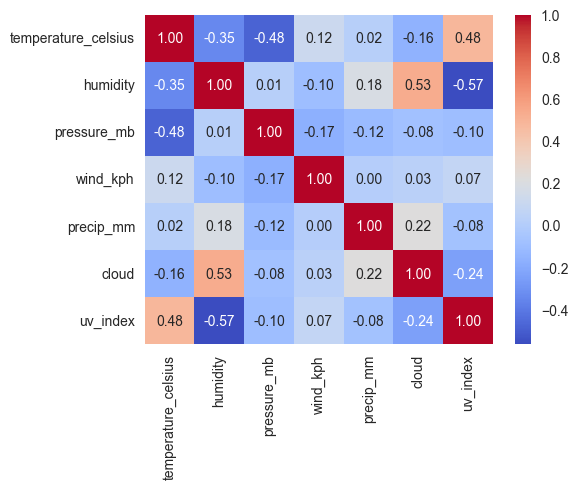

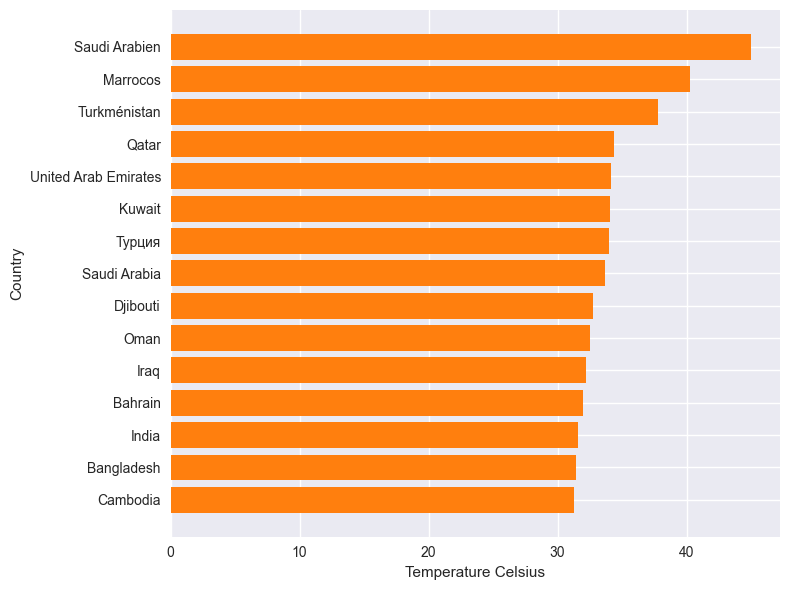

In [19]:
# Streamlit App: ClimateScope Interactive Dashboard

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

st.set_page_config(page_title="ClimateScope Dashboard", layout="wide")

@st.cache_data
def load_data():
    df = pd.read_csv("cleaned_weather_data.csv", parse_dates=["date", "last_updated"])

    # Ensure helper columns exist
    if "month" not in df.columns:
        df["month"] = df["date"].dt.month

    if "season" not in df.columns:
        def get_season(m):
            if m in [3, 4, 5]:
                return "Spring"
            elif m in [6, 7, 8]:
                return "Summer"
            elif m in [9, 10, 11]:
                return "Fall"
            else:
                return "Winter"
        df["season"] = df["month"].apply(get_season)

    if "latitude_zone" not in df.columns:
        def get_latitude_zone(lat):
            if lat >= 66.5:
                return "Arctic"
            elif lat >= 23.5:
                return "Northern Temperate"
            elif lat >= -23.5:
                return "Tropical"
            elif lat >= -66.5:
                return "Southern Temperate"
            else:
                return "Antarctic"
        df["latitude_zone"] = df["latitude"].apply(get_latitude_zone)

    return df


df_streamlit = load_data()

st.title("🌍 ClimateScope - Global Weather Dashboard")
st.markdown("Use the filters in the sidebar to explore the dataset interactively.")

# ------------------------- SIDEBAR FILTERS -------------------------
st.sidebar.header("Filters")

countries = sorted(df_streamlit["country"].dropna().unique().tolist())
selected_countries = st.sidebar.multiselect(
    "Country", options=countries, default=countries
)

min_date = df_streamlit["date"].min().date()
max_date = df_streamlit["date"].max().date()
selected_date_range = st.sidebar.date_input(
    "Date Range", value=(min_date, max_date), min_value=min_date, max_value=max_date
)

seasons = sorted(df_streamlit["season"].dropna().unique().tolist())
selected_seasons = st.sidebar.multiselect(
    "Season", options=seasons, default=seasons
)

lat_zones = sorted(df_streamlit["latitude_zone"].dropna().unique().tolist())
selected_zones = st.sidebar.multiselect(
    "Latitude Zones", options=lat_zones, default=lat_zones
)

variables = [
    "temperature_celsius",
    "humidity",
    "pressure_mb",
    "wind_kph",
    "precip_mm",
    "cloud",
    "uv_index",
]
selected_variable = st.sidebar.selectbox("Weather Variable", options=variables, index=0)

extreme_only = st.sidebar.checkbox("Show only extreme events", value=False)

# ------------------------- APPLY FILTERS -------------------------
filtered = df_streamlit.copy()

if selected_countries:
    filtered = filtered[filtered["country"].isin(selected_countries)]

start_date, end_date = selected_date_range
filtered = filtered[(filtered["date"].dt.date >= start_date) & (filtered["date"].dt.date <= end_date)]

if selected_seasons:
    filtered = filtered[filtered["season"].isin(selected_seasons)]

if selected_zones:
    filtered = filtered[filtered["latitude_zone"].isin(selected_zones)]

if extreme_only and not filtered.empty:
    # Define extreme thresholds using percentiles (like notebook analysis)
    extreme_thresholds = {
        "temperature_celsius": {
            "hot": filtered["temperature_celsius"].quantile(0.95),
            "cold": filtered["temperature_celsius"].quantile(0.05),
        },
        "wind_kph": {
            "high": filtered["wind_kph"].quantile(0.95),
        },
        "precip_mm": {
            "heavy": filtered.loc[filtered["precip_mm"] > 0, "precip_mm"].quantile(0.95)
            if (filtered["precip_mm"] > 0).any() else 0,
        },
        "humidity": {
            "high": filtered["humidity"].quantile(0.95),
            "low": filtered["humidity"].quantile(0.05),
        },
    }

    is_extreme = (
        (filtered["temperature_celsius"] >= extreme_thresholds["temperature_celsius"]["hot"]) |
        (filtered["temperature_celsius"] <= extreme_thresholds["temperature_celsius"]["cold"]) |
        (filtered["wind_kph"] >= extreme_thresholds["wind_kph"]["high"]) |
        (filtered["precip_mm"] >= extreme_thresholds["precip_mm"]["heavy"]) |
        (filtered["humidity"] >= extreme_thresholds["humidity"]["high"]) |
        (filtered["humidity"] <= extreme_thresholds["humidity"]["low"])
    )
    filtered = filtered[is_extreme]

st.markdown(f"**Filtered records:** {len(filtered):,} (out of {len(df_streamlit):,})")

if filtered.empty:
    st.warning("No data available for the selected filters.")
    st.stop()

# ------------------------- KPI CARDS -------------------------
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.metric("Avg Temperature (°C)", f"{filtered['temperature_celsius'].mean():.2f}")
with col2:
    st.metric("Total Precipitation (mm)", f"{filtered['precip_mm'].sum():.2f}")
with col3:
    st.metric("Avg Wind (kph)", f"{filtered['wind_kph'].mean():.2f}")
with col4:
    st.metric("Locations", f"{filtered['location_name'].nunique():,}")

st.markdown("---")

# ------------------------- TIME SERIES CHARTS -------------------------

st.subheader("Time Series Trends")

# Aggregate daily
daily = (
    filtered.groupby("date").agg(
        temperature_celsius=("temperature_celsius", "mean"),
        precip_mm=("precip_mm", "sum"),
    ).reset_index()
)

col_ts1, col_ts2 = st.columns(2)

with col_ts1:
    st.markdown("**Temperature Over Time**")
    st.line_chart(daily.set_index("date")["temperature_celsius"])

with col_ts2:
    st.markdown("**Precipitation Over Time**")
    st.line_chart(daily.set_index("date")["precip_mm"])

# ------------------------- CORRELATION HEATMAP -------------------------

st.subheader("Correlation Matrix (Selected Variables)")

corr_vars = [
    "temperature_celsius",
    "humidity",
    "pressure_mb",
    "wind_kph",
    "precip_mm",
    "cloud",
    "uv_index",
]

corr = filtered[corr_vars].corr()

fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, ax=ax)
plt.tight_layout()
st.pyplot(fig)

# ------------------------- REGIONAL BAR CHART -------------------------

st.subheader("Top Countries by Selected Variable")

country_metric = (
    filtered.groupby("country")[selected_variable]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.barh(country_metric.index, country_metric.values, color="tab:orange")
ax2.set_xlabel(selected_variable.replace("_", " ").title())
ax2.set_ylabel("Country")
ax2.invert_yaxis()
plt.tight_layout()
st.pyplot(fig2)

# ------------------------- EXTREME EVENTS TABLE -------------------------

st.subheader("Extreme Events (Sample)")

# Simple definition: top 200 rows with highest absolute z-score for temperature
if len(filtered) > 0:
    tmp = filtered.copy()
    tmp["temp_zscore"] = (tmp["temperature_celsius"] - tmp["temperature_celsius"].mean()) / tmp["temperature_celsius"].std()
    extreme_sample = (
        tmp.reindex(tmp["temp_zscore"].abs().sort_values(ascending=False).index)
        [["date", "country", "location_name", "temperature_celsius", "humidity", "wind_kph", "precip_mm"]]
        .head(200)
    )
    st.dataframe(extreme_sample)
else:
    st.info("No extreme events to display for the current filters.")

st.markdown("---")
st.caption("Run this app with: `streamlit run Task-2.ipynb` is not supported; instead, save the logic to a `.py` file if needed.")
